In [4]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline



In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#Loaded the Dataset
datset = pd.read_csv('games.csv')

In [8]:
# Understanding the Datset
print(datset.columns)

Index([u'id', u'type', u'name', u'yearpublished', u'minplayers', u'maxplayers',
       u'playingtime', u'minplaytime', u'maxplaytime', u'minage',
       u'users_rated', u'average_rating', u'bayes_average_rating',
       u'total_owners', u'total_traders', u'total_wanters', u'total_wishers',
       u'total_comments', u'total_weights', u'average_weight'],
      dtype='object')


In [9]:
# Understanding the Datset
print(datset.shape)

(81312, 20)


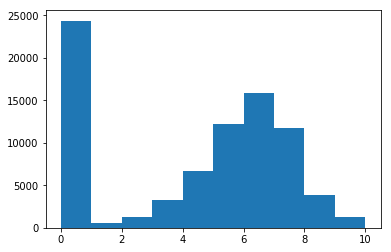

In [10]:
# plot histogram for average ratings
plt.hist(datset['average_rating'])
plt.show()
# My inference here is no. of users for average around 1 is pretty high surprisingly 

In [16]:
# Print first row of all the games with zero users

print(datset[datset['average_rating'] == 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


In [17]:
# First row of datset with with rating more than 0
print(datset[datset['average_rating'] > 0].iloc[0])

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


In [20]:
# need to reomve the games with zero ratings
datset= datset[datset['users_rated']> 0]
# removed all empty values
datset = datset.dropna(axis=0)

In [21]:
datset[0:100]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
5,31260,boardgame,Agricola,2007.0,1.0,5.0,150.0,30.0,150.0,12.0,39714,8.11957,8.03847,47522,837,958,6402,9310,5065,3.6160
6,124742,boardgame,Android: Netrunner,2012.0,2.0,2.0,45.0,45.0,45.0,14.0,15281,8.16760,7.97822,24381,680,627,3244,3202,1260,3.3103
7,96848,boardgame,Mage Knight Board Game,2011.0,1.0,4.0,150.0,150.0,150.0,14.0,12697,8.15901,7.96929,18769,367,1116,5427,2861,1409,4.1292
8,84876,boardgame,The Castles of Burgundy,2011.0,2.0,4.0,90.0,30.0,90.0,12.0,15461,8.07879,7.95011,20558,215,929,3681,3244,1176,3.0442
9,72125,boardgame,Eclipse,2011.0,2.0,6.0,200.0,60.0,200.0,14.0,15709,8.07933,7.93244,17611,273,1108,5581,3188,1486,3.6359


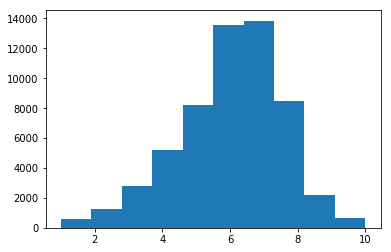

In [22]:
# plotted again to test
plt.hist(datset['average_rating'])
plt.show()

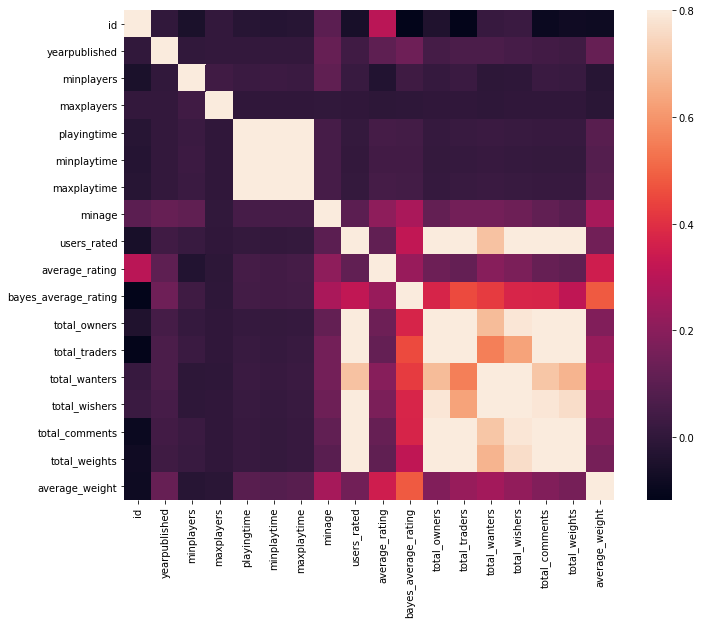

In [23]:
corrmat = datset.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat,vmax=0.8,square =True)
plt.show()

In [25]:
# Filtered columns which doesn't have any dependency
columns= datset.columns.tolist()
datset_new = [c for c in columns if c not in ['bayes_average_rating','id', 'type', 'name']]
target = 'average_rating'

In [28]:
# split data set now to train and test
train_set = datset.sample(frac=0.8,random_state=1)
# rest of the 20% of the data will be allocated to validation set
test_set  =datset.loc[~datset.index.isin(train_set.index)]

In [29]:
#  Testing  the results
print(train_set.shape)
print(test_set.shape)


(45515, 20)
(11379, 20)


In [34]:
# Imported Linear Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [35]:
# Initialize the models
LR = LinearRegression()
# Fitted the train set to the model
LR.fit(train_set[datset_new],train_set[target])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
# Predict on Test Set
Predictions=LR.predict(test_set[datset_new])

# TIme to compute error between test predictions and actual predictions
mean_squared_error(Predictions,test_set[target])

3.9381664752658765e-26

In [40]:
# RMSE is high here so can't go with Linear Regression, there is strong linear relationships

In [41]:
# Calling this algorithm to tackle non-linearity in the datset
from sklearn.ensemble import RandomForestRegressor

In [43]:
# Initialized the RF model
RF = RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)
#Fit the Data to the model
RF.fit(train_set[datset_new],train_set[target])


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [44]:
# Predictions 
Predictions_RF=RF.predict(test_set[datset_new])
# Computing RMSE
mean_squared_error(Predictions_RF,test_set[target])

1.8253393967762123e-05

In [ ]:
# This(Random Forest Regressor ) is better than Linear regressor model for this dataset